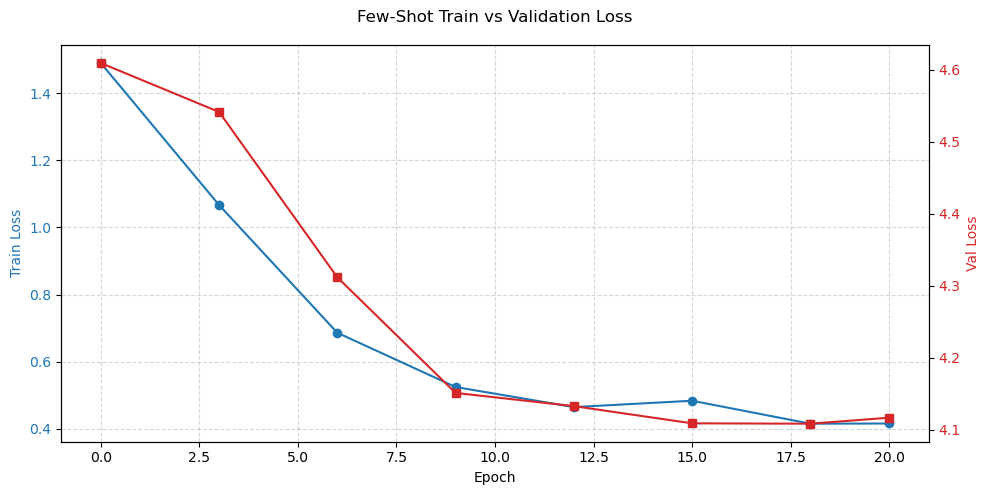

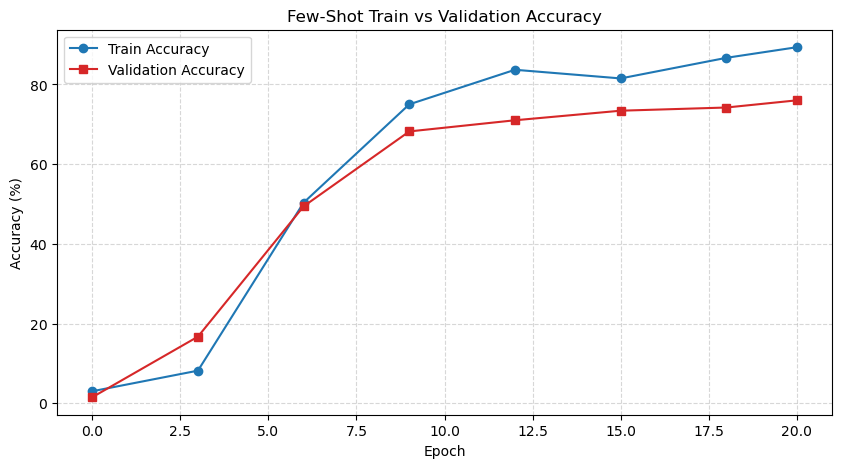

In [1]:
import matplotlib.pyplot as plt

# Epochs for few-shot
epochs = [0, 3, 6, 9, 12, 15, 18, 20]

# Train and validation loss
train_loss = [1.4893, 1.0665, 0.6862, 0.5247, 0.4649, 0.4838, 0.4155, 0.4161]
val_loss   = [4.6093, 4.5414, 4.3118, 4.1513, 4.1330, 4.1091, 4.1086, 4.1169]

# Train and validation accuracy
train_acc = [3.0, 8.17, 50.33, 75.0, 83.67, 81.5, 86.67, 89.33]  # in %
val_acc   = [1.5, 16.7, 49.4, 68.2, 71.0, 73.4, 74.2, 76.0]      # in %

# ------------------- Plot Loss -------------------
fig, ax1 = plt.subplots(figsize=(10,5))

color = 'tab:blue'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Train Loss', color=color)
ax1.plot(epochs, train_loss, marker='o', color=color, label='Train Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Val Loss', color=color)
ax2.plot(epochs, val_loss, marker='s', color=color, label='Val Loss')
ax2.tick_params(axis='y', labelcolor=color)

fig.suptitle('Few-Shot Train vs Validation Loss')
fig.tight_layout()
plt.show()

# ------------------- Plot Accuracy (same axis) -------------------
plt.figure(figsize=(10,5))
plt.plot(epochs, train_acc, marker='o', color='tab:blue', label='Train Accuracy')
plt.plot(epochs, val_acc, marker='s', color='tab:red', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Few-Shot Train vs Validation Accuracy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.show()
